# Introduction

In [4]:
#### The dataset contains information about 10,000 movies 

In [5]:
#including libries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

In [6]:
#scatterplot from the most visulaiztions used
def ScatterPlot(xlabel,ylabel,title):
    tmd.plot(x=xlabel,y=ylabel,kind="scatter",figsize=(10,5),fontsize=25)
    # Adding x label 
    plt.xlabel(xlabel,fontsize = 15, weight = "bold")
    # Adding y label and format it
    plt.ylabel(ylabel, fontsize = 15, weight = "bold")
    #adding title
    plt.title(title, fontsize = 15, weight = "bold")
    return 

In [7]:
#load dataset
tmd= pd.read_csv('/home/workspace/Database_TMDb_movie_data/tmdb-movies.csv')

In [8]:
#get knowledge of dataset coloumns
tmd.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

## Questions
### 1)Which genres are most popular?
### 2)What kinds of properties are associated with movies that have high revenues?
### 3)is the revenue depend on budget ?
### 4)How many movies Displays every year?
### 5)before watching is people prefere long movies or short movies to watch ?

<a id='wrangling'></a>
# Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [9]:
tmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### there's missing data in cloumns : imdb_id  , cast  , homepage , director , tagline , keywords ,  overview , genres  and production_companies 
#### there's many missied values 

In [10]:
tmd.shape

(10866, 21)

In [11]:
tmd.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10842    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849    False
10850    False
10851    False
10852    False
10853    False
10854    False
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [12]:
tmd.isnull().sum().sum()

13434

### Data Cleaning

#### removing unneccessary coloumns

In [13]:
tmd.drop(['id','imdb_id','homepage','tagline','original_title','tagline','keywords','overview'],axis=1,inplace=True)

#### remove Dublicated rows

In [14]:
tmd.drop_duplicates(inplace=True)

#### romoving rows which have null values

In [15]:
tmd.dropna(axis=0,inplace=True)

#### make sure no other null values

In [16]:
tmd.isnull().sum().sum()

0

In [17]:
#now we have cleaned the data it's the time to explore

<a id='eda'></a>
# Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which genres are most popular?)

In [18]:
#overview about genres
tmd['genres']

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [19]:
#some movies have more than genre so it is better to partition
tmd['genres'] = tmd['genres'].apply(lambda x: x.split('|')[0])

In [20]:
#now our concentration on genres and popularity 
tmd.groupby('genres')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,1479.0,0.875737,1.623498,0.002648,0.267198,0.468552,0.940558,32.985763
Adventure,550.0,1.277373,1.864208,0.007304,0.318113,0.672259,1.627253,24.949134
Animation,346.0,0.896613,0.926462,0.005265,0.310773,0.589059,1.110111,6.112766
Comedy,2084.0,0.572296,0.592537,0.000620,0.222046,0.405855,0.706666,6.715966
Crime,361.0,0.719750,0.849964,0.001372,0.258710,0.456164,0.851712,5.898400
Documentary,264.0,0.211205,0.172661,0.001783,0.081655,0.182422,0.283417,1.005772
Drama,2223.0,0.587367,0.699886,0.001983,0.236684,0.400218,0.679424,8.947905
Family,128.0,0.783861,1.043699,0.013814,0.223201,0.470687,0.798941,7.404165
Fantasy,253.0,0.911306,1.071786,0.014992,0.259501,0.497265,1.115598,7.031452


Text(0.5,1,'popularity for each  movie genre')

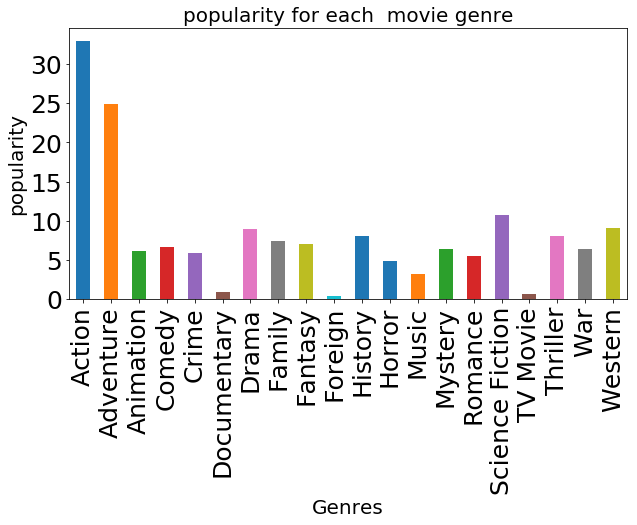

In [21]:
(tmd.groupby('genres')['popularity'].max()).plot(kind="bar",figsize=(10,5),fontsize=25,x='Genres', y='popularity');
plt.xlabel('Genres',fontsize=20)
plt.ylabel('popularity',fontsize=20)
plt.title('popularity for each  movie genre',fontsize=20)

#### Max popularity is action movies about 33

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

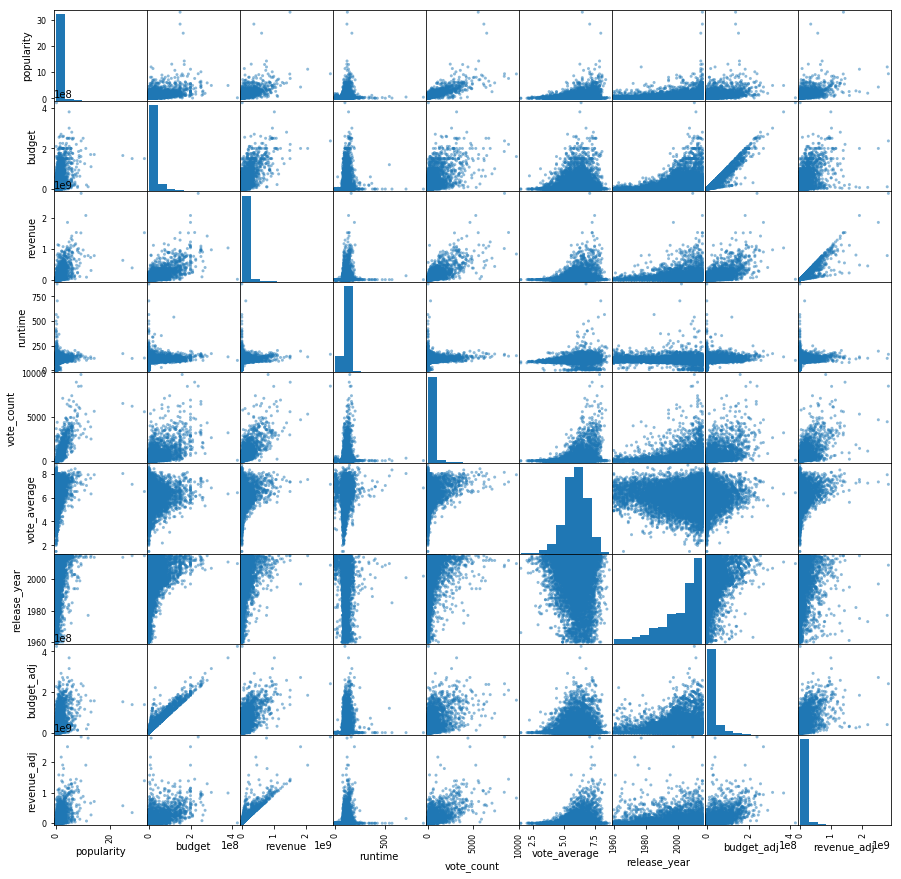

In [22]:
pd.plotting.scatter_matrix(tmd,figsize=(15,15));

#### there's a relation between revenue and budget ,vote_count and popularity so this properties associeted with revenue

### Research Question 3  (is the revenue depend on budget ?)

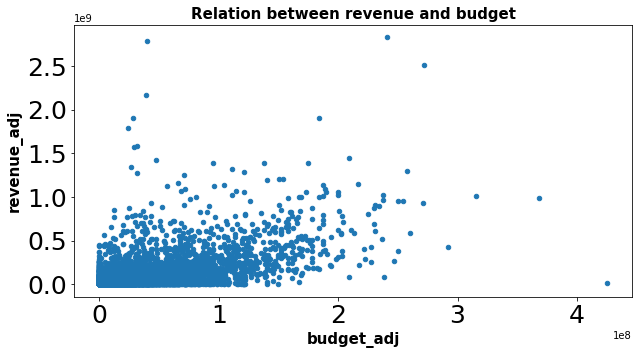

In [23]:
ScatterPlot('budget_adj','revenue_adj', 'Relation between revenue and budget');

#### there is a postive correlation between budget and revenue so there's a relation between them


### Research Question 4  (How many movies Displays every year?)

In [24]:
tmd.columns

Index(['popularity', 'budget', 'revenue', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

Text(0.5,1,'Number of films per year')

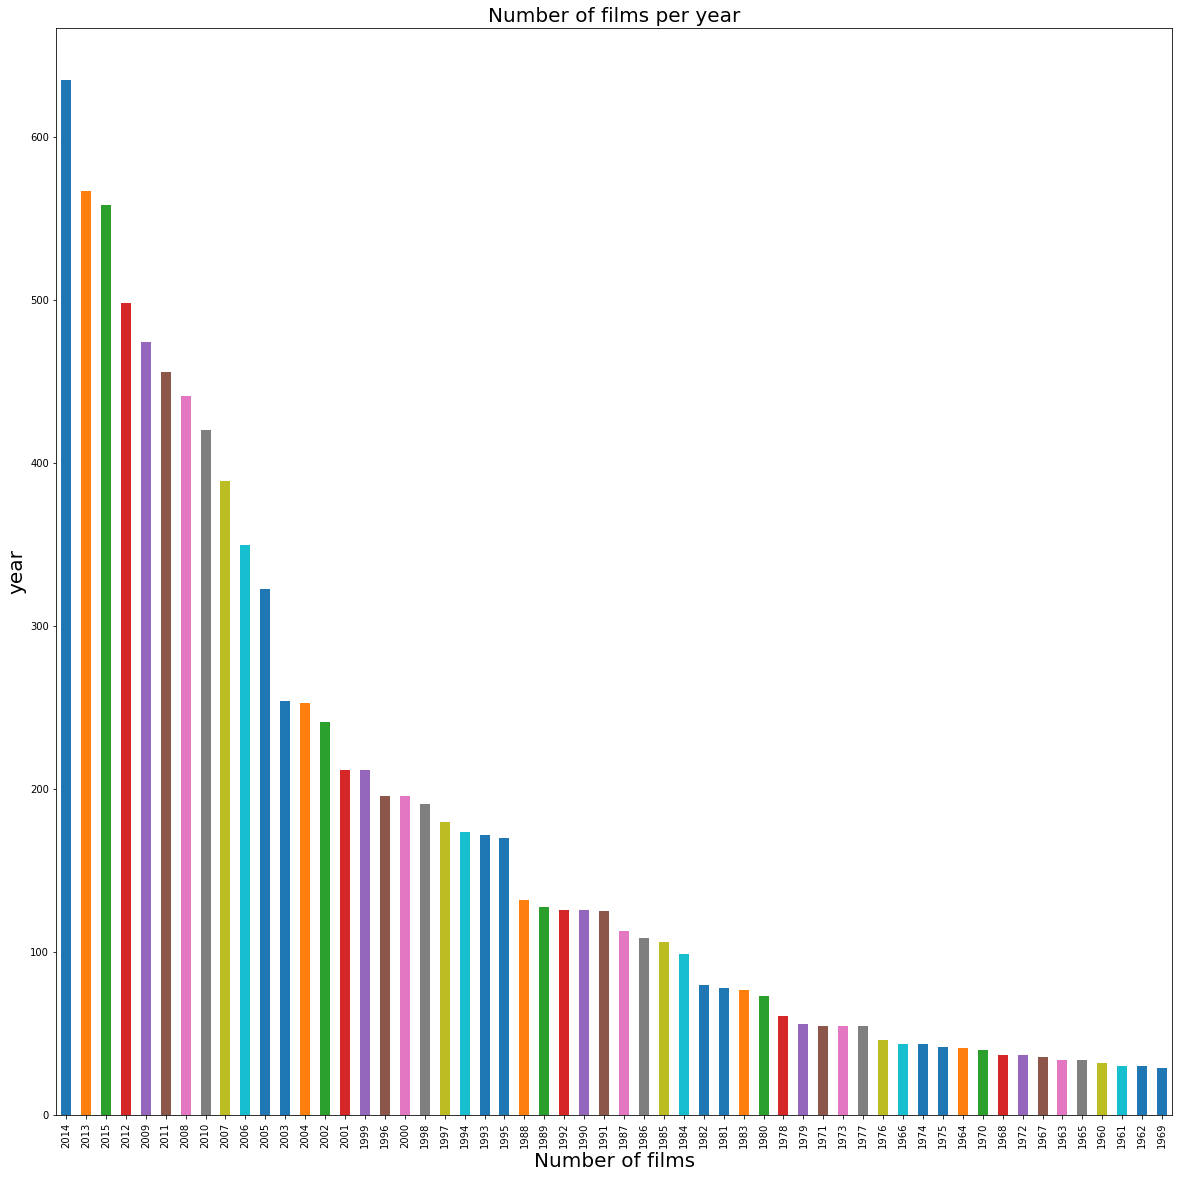

In [25]:
tmd['release_year'].value_counts().plot(kind='bar',figsize=(20,20));
plt.xlabel('Number of films',fontsize=20)
plt.ylabel('year',fontsize=20)
plt.title('Number of films per year',fontsize=20)

#### wow there's incredibly increasing in number of films over years

### Research Question 5 (before watching is people prefere long movies or short movies to watch ?)

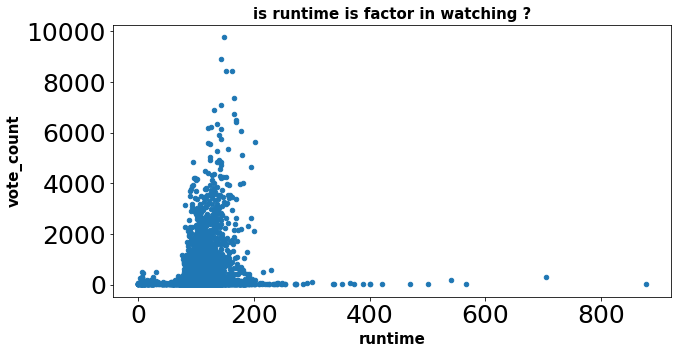

In [28]:
ScatterPlot('runtime','vote_count', 'is runtime is factor in watching ?');

#### mostly watcher don't ask about run time before watching 

# Conclusions

#### The dataset have many NULL values

#### The action and adventure genres are most popular and there's a big difference between them and other genres

 #### The high budget are refleted in revenue , vote_count and popularity 

#### there is a postive correlation between budget and revenue so there's a relation between them

#### The number of films are increased every years

## Limitaions

#### Due to many null values i think it effect the analysis process


In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0